## Preprocessing data

[Dataset](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction?resource=download)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
data = pd.read_csv("/content/ParisHousing.csv")
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["squareMeters", "numberOfRooms", "floors", "cityPartRange", "numPrevOwners", "made", "basement", "attic", "garage", "hasGuestRoom"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom"])
)

# create X and y value
X = data.drop("price", axis = 1)
y = data["price"]

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the column transformer
ct.fit(X_train)

# transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [4]:
X_train_normal[0]

array([0.81553729, 0.56565657, 0.01010101, 0.66666667, 0.        ,
       0.        , 0.61916192, 0.99689969, 0.70666667, 0.2       ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ])

In [5]:
X_test_normal[0]

array([0.79573015, 0.06060606, 0.60606061, 0.77777778, 0.11111111,
       0.19354839, 0.33713371, 0.76027603, 0.88444444, 0.1       ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ])

## Build a neural network

In [6]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# fit
model.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 4955115.5000 - mae: 4955115.5000
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 4651973.5000 - mae: 4651973.5000
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 3390045.5000 - mae: 3390045.5000
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 2428244.2500 - mae: 2428244.2500
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 2335861.2500 - mae: 2335861.2500
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 2314878.0000 - mae: 2314878.0000
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 2294227.0000 - mae: 2294227.0000
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 2272655.2500 - mae: 2272655.2500
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 2249459.2500 - mae: 2249459.2500
Epoch 10/100
250/250 [======

In [7]:
# evaluate the model
model.evaluate(X_test_normal, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 1843.9484 - mae: 1843.9484


[1843.9483642578125, 1843.9483642578125]

In [11]:
# make some predictions
y_pred = model.predict(X_test_normal)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[7964127. ],
       [3715542.5],
       [8556301. ],
       ...,
       [1950049.1],
       [2944934.8],
       [7044280. ]], dtype=float32)

## Plotting

In [16]:
def plot_predictions(train_data = X_train_normal[:,0], 
                     train_labels = y_train,
                     test_data = X_test_normal[:,0],
                     test_labels = y_test, 
                     predictions = y_pred):
  """
  Plots training data,test data, and compares to predictions to ground truth labels
  """
  plt.figure(figsize = (15, 14))

  # plot test data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Test Data")

  # plot predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")

  # show a legend
  plt.legend()

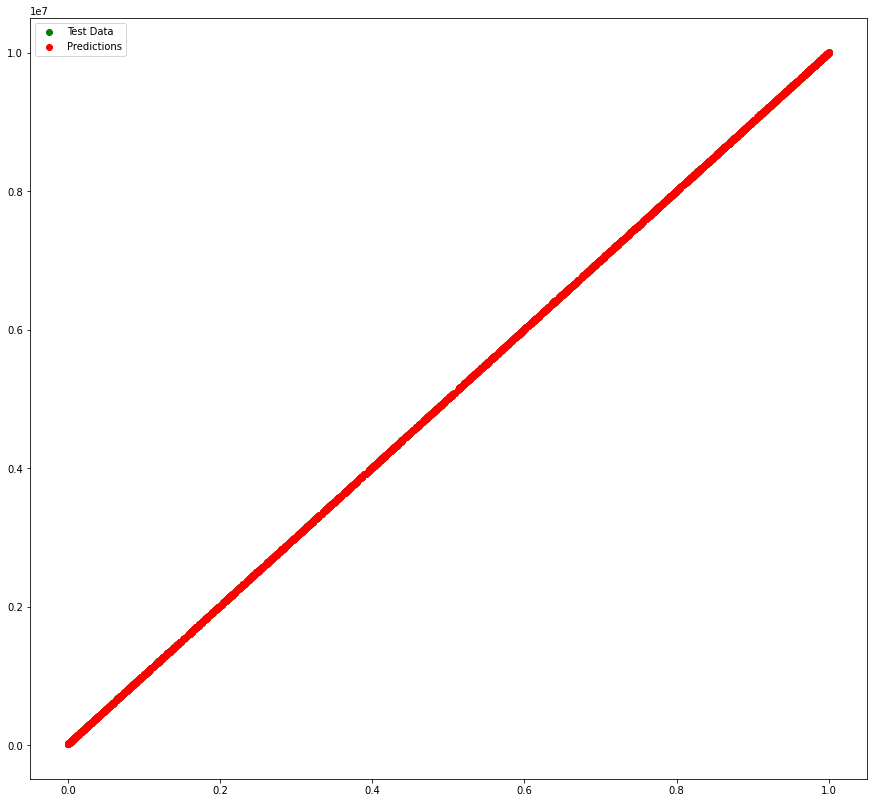

In [17]:
plot_predictions()